# Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobilenet_v2_fpnlite' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'DS_PATH': os.path.join('Tensorflow', 'workspace','images','dataset'),
    'TRAIN_PATH': os.path.join('Tensorflow', 'workspace','images','train'),
    'TEST_PATH': os.path.join('Tensorflow', 'workspace','images','test'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
my_files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir -p {path}

#Number Plate Detection

## 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 78382, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 78382 (delta 87), reused 171 (delta 84), pack-reused 78197
Receiving objects: 100% (78382/78382), 593.59 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (55693/55693), done.


In [8]:
# Install Tensorflow Object Detection  
!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 61.3 MB/s 
     |███████████████████████████████

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-11-02 10:05:35.558372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 10:05:35.729285: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 10:05:36.547806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-02 10:05:36.548023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cann

In [10]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 


In [11]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
apache-beam                   2.42.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
avro-python3                  1.10.2
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
ble

In [12]:
import object_detection

In [13]:
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-11-02 10:07:14--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.194.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.06s   

2022-11-02 10:07:14 (334 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu

## 2. Create Label Map

In [14]:
labels = [{'name':'licence', 'id':1}]

with open(my_files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 3. Create TF records

In [15]:
!pip install -q kaggle

In [16]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tariktaoui","key":"e2bce5bdfadaccea05ca58f2987de9d0"}'}

In [17]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           8339        271  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6670        216  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          11693        211  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [19]:
!kaggle datasets download -d andrewmvd/car-plate-detection

 99% 201M/203M [00:14<00:00, 17.0MB/s]
100% 203M/203M [00:14<00:00, 14.4MB/s]


In [20]:
!unzip 'car-plate-detection.zip' -d 'Tensorflow/workspace/images/dataset'

Archive:  car-plate-detection.zip
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars0.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars1.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars10.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars100.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars101.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars102.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars103.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars104.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars105.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars106.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars107.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars108.xml  
  inflating: Tensorflow/workspace/images/dataset/annotations/Cars109.xm

In [21]:
count = 0
for filename in os.listdir(os.path.join(paths['DS_PATH'], 'images')):
  existing_filepath = os.path.join(paths['DS_PATH'] , 'images' , f'Cars{count}.png')
  if os.path.exists(existing_filepath):
    if count < 401:
      new_filepath = os.path.join (paths['TRAIN_PATH'], f'Cars{count}.png')
      os.replace(existing_filepath, new_filepath)
    else:
      new_filepath = os.path.join (paths['TEST_PATH'], f'Cars{count}.png')
      os.replace(existing_filepath, new_filepath)
    count += 1

In [22]:
count = 0
for filename in os.listdir(os.path.join(paths['DS_PATH'], 'annotations')):
  existing_filepath = os.path.join(paths['DS_PATH'] , 'annotations' , f'Cars{count}.xml')
  if os.path.exists(existing_filepath):
    if count < 401:
      new_filepath = os.path.join (paths['TRAIN_PATH'], f'Cars{count}.xml')
      os.replace(existing_filepath, new_filepath)
    else:
      new_filepath = os.path.join (paths['TEST_PATH'], f'Cars{count}.xml')
      os.replace(existing_filepath, new_filepath)
    count += 1

In [23]:
if not os.path.exists(my_files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


DO NOT FORGET TO CHANGE THE OBJECT INDEX FROM 4 TO 5 IN THE generate_tfrecords.py SCRIPT

In [24]:
!python {my_files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {my_files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {my_files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {my_files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

2022-11-02 10:08:20.668604: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
2022-11-02 10:08:24.758060: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


## 4. Copy Model Config to Training Folder

In [25]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

## 5. Update Config For Transfer Learning

In [26]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [27]:
config = config_util.get_configs_from_pipeline_file(my_files['PIPELINE_CONFIG'])

In [28]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [29]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(my_files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [30]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= my_files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = my_files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [31]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(my_files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 6. Train the model

In [32]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [33]:
command = f"python {TRAINING_SCRIPT} --model_dir={paths['CHECKPOINT_PATH']} --pipeline_config_path={my_files['PIPELINE_CONFIG']} --num_train_steps=10000"

In [34]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite/pipeline.config --num_train_steps=10000


In [35]:
!{command}

2022-11-02 10:08:34.432475: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 10:08:35.186279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-02 10:08:35.186383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-02 10:08:35.186402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

## 7. Load Train Model From Checkpoint, RESTART IS NECESSARY

In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [2]:
!nvidia-smi

Wed Nov  2 10:37:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    14W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Limit RetinaNet Available memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    try:
      tf.config.experimental.set_virtual_device_configuration(
          gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10420)]
      )
    except RuntimeError as e:
      print(e)

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobilenet_v2_fpnlite' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'DS_PATH': os.path.join('Tensorflow', 'workspace','images','dataset'),
    'TRAIN_PATH': os.path.join('Tensorflow', 'workspace','images','train'),
    'TEST_PATH': os.path.join('Tensorflow', 'workspace','images','test'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
my_files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
labels = [{'name':'licence', 'id':1}]

with open(my_files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [8]:
config = config_util.get_configs_from_pipeline_file(my_files['PIPELINE_CONFIG'])

In [9]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(my_files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## 8. Detect from an Image

In [10]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
category_index = label_map_util.create_category_index_from_labelmap(my_files['LABELMAP'])

In [18]:
IMAGE_PATH = os.path.join(paths['TEST_PATH'], 'Cars410.png')

[0.75199336 0.090961   0.08805629 0.0845805  0.04844387 0.04086521
 0.03895888 0.0386987  0.03799568 0.03562674 0.03525894 0.03274508
 0.03196383 0.03192098 0.03116513 0.03038396 0.02888333 0.02781801
 0.02756133 0.027285   0.02704283 0.0258413  0.02480283 0.0246873
 0.02439916 0.02430498 0.02380715 0.02257608 0.0221373  0.02208977
 0.02131934 0.02096673 0.0204868  0.01999588 0.01901598 0.01844737
 0.01836115 0.01762009 0.01731242 0.01710195 0.01702765 0.01677547
 0.01637656 0.01609077 0.01570686 0.01565097 0.01559028 0.01553517
 0.01544484 0.01530364 0.01529679 0.0152283  0.01512563 0.01506435
 0.0150005  0.01480769 0.01478523 0.01478364 0.01461188 0.01458148
 0.01446993 0.01444394 0.01437337 0.01433386 0.01426987 0.01416786
 0.01402064 0.01396423 0.01380181 0.01373677 0.01355253 0.01353177
 0.01345439 0.01336446 0.01331169 0.01319014 0.01314625 0.01307752
 0.01274914 0.0125919  0.01252165 0.01240788 0.01197371 0.0118872
 0.011748   0.01173508 0.01168917 0.01167334 0.01164936 0.011500

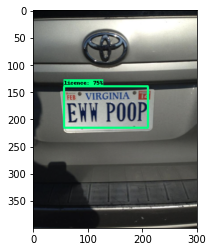

In [19]:
from PIL import Image
from IPython.display import display

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
print(detections['detection_scores'])

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.4,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

#Number Plate Recognition 

##1. Setup EasyOCR

In [14]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 30.2 MB/s 
     |████████████████████████████████| 604 kB 66.9 MB/s 
     |████████████████████████████████| 120 kB 71.8 MB/s 


In [19]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio==0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/lts/1.8/cu111
     |█████████████▌                  | 834.1 MB 3.2 MB/s eta 0:06:04tcmalloc: large alloc 1147494400 bytes == 0x399c6000 @  0x7f1bb553d615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:53tcmalloc: large alloc 1434370048 bytes == 0x7e01c000 @  0x7f1bb553d615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████████▋    

## 2. Apply EasyOCR

In [14]:
def filter_text(plate, ocr_result, region_threshold):
  plate_size = plate.shape[0] * plate.shape[1]

  plate_text = []
  for result in ocr_result:
    width = np.sum(np.subtract(result[0][1], result[0][0]))
    height = np.sum(np.subtract(result[0][2], result[0][1]))

    if width * height / plate_size > region_threshold:
      plate_text.append(result[1])
  return plate_text

In [15]:
def ocr(image, detections, detection_threshold, region_threshold):
  scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))
  boxes = detections['detection_boxes'][:len(scores)]
  classes = detections['detection_classes'][:len(scores)]

  width, height = image.shape[1], image.shape[0]

  for i, box in enumerate(boxes):
    roi = box * [height, width, height, width]
    plate = image[int(roi[0]):int(roi[2]), int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(plate)
    text = filter_text(plate, ocr_result, region_threshold)
    return text, plate

In [20]:
import easyocr

ocr(image_np_with_detections, detections, .4, .4)

(['EWR POOP'], array([[[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [127, 255,   0],
         [127, 255,   0],
         [127, 255,   0]],
 
        [[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [127, 255,   0],
         [127, 255,   0],
         [127, 255,   0]],
 
        [[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [ 38,  30,  25],
         [127, 255,   0],
         [127, 255,   0]],
 
        ...,
 
        [[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [168, 171, 167],
         [127, 255,   0],
         [127, 255,   0]],
 
        [[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [167, 169, 166],
         [127, 255,   0],
         [127, 255,   0]],
 
        [[127, 255,   0],
         [127, 255,   0],
         [127, 255,   0],
         ...,
         [127,